In [1]:
library(ggtree)
library(tidyverse)
library(treeio)

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

ggtree v2.4.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics, 2020, 69:e96. doi:10.1002/cpbi.96
- Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
- Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36. doi:10.1111/2041-210X.12628



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔

## Example 1

Examples from https://4va.github.io/biodatasci/r-ggtree.html

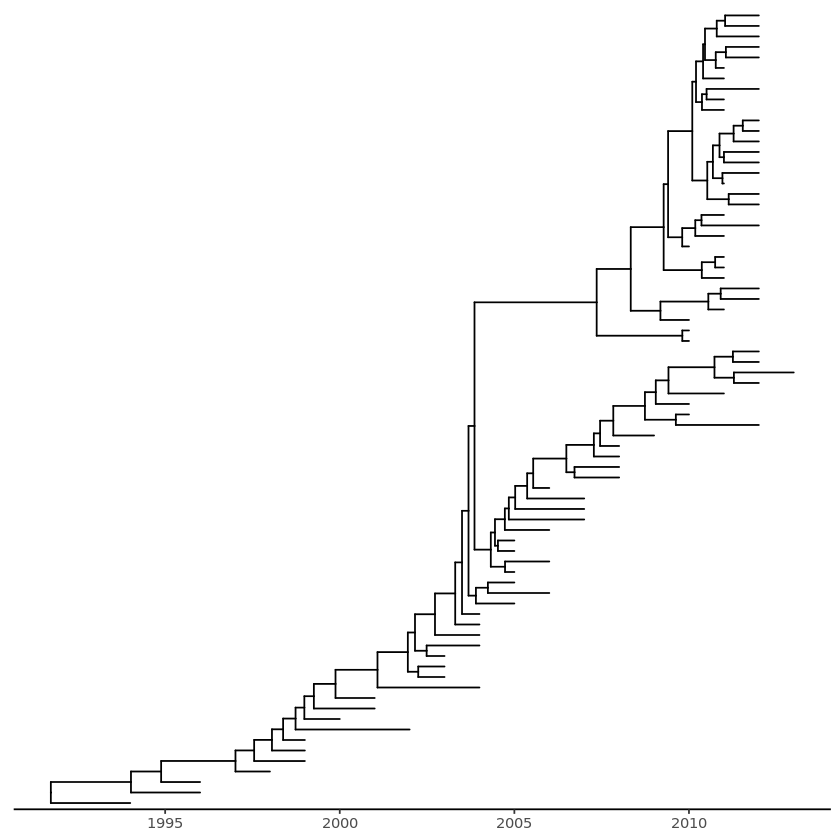

In [20]:
# Read the data
tree <- read.beast("https://4va.github.io/biodatasci/data/flu_tree_beast.tree")

# supply a most recent sampling date so you get the dates
# and add a scale bar
ggtree(tree, mrsd="2013-01-01") + 
  theme_tree2() 


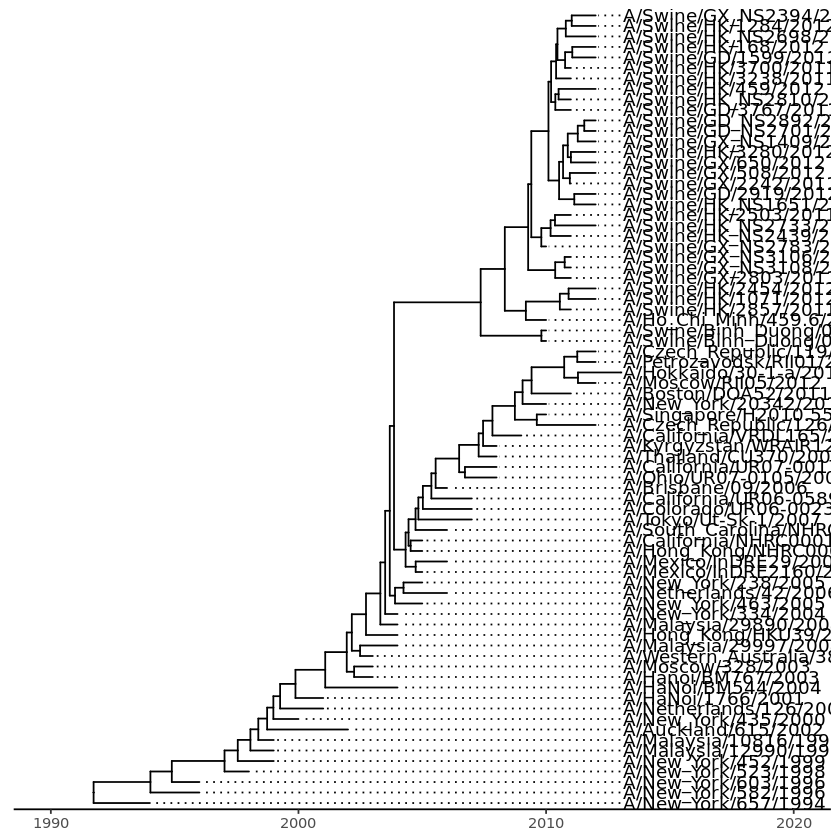

In [21]:

# Finally, add tip labels and adjust axis
ggtree(tree, mrsd="2013-01-01") + 
  theme_tree2() + 
  geom_tiplab(align=TRUE, linesize=.5) + 
  xlim(1990, 2020)

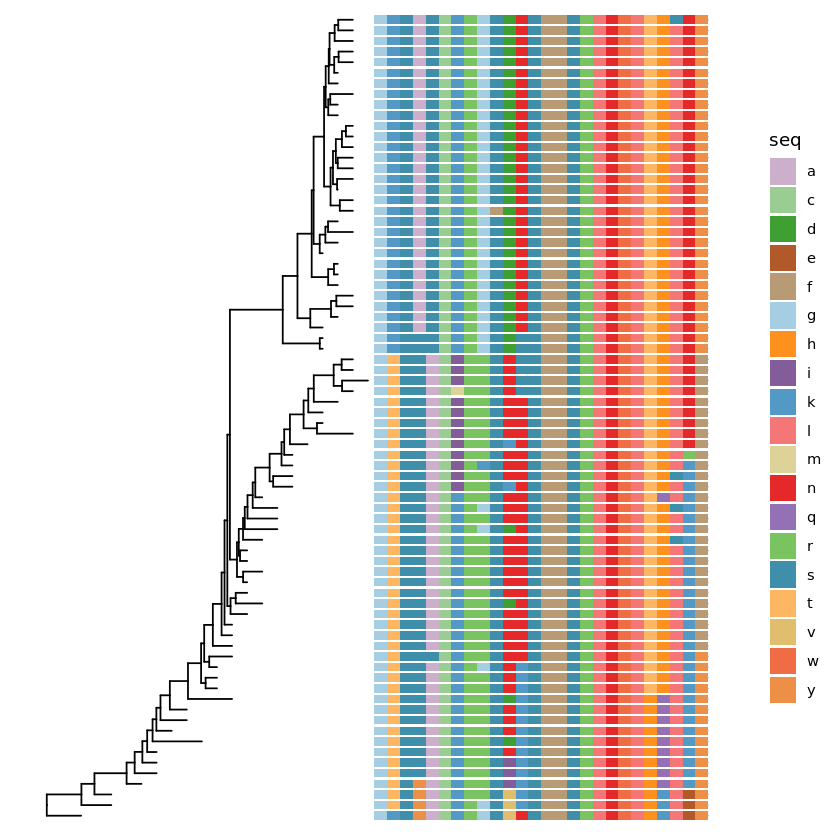

In [24]:
msaplot(p=ggtree(tree), fasta="https://4va.github.io/biodatasci/data/flu_aasequence.fasta", window=c(150, 175))

## Example 2

sample code is from https://yulab-smu.top/treedata-book/chapter7.html

In [12]:
library(ggtree)
remote_folder <- paste0("https://raw.githubusercontent.com/katholt/",
                         "plotTree/master/tree_example_april2015/")
##remote_folder <- "data/tree_example_april2015/" 

## read the phylogenetic tree
tree <- read.tree(paste0(remote_folder, "tree.nwk"))

## read the sampling information data set
info <- read.csv(paste0(remote_folder,"info.csv"))

## read and process the allele table
snps<-read.csv(paste0(remote_folder, "alleles.csv"), header = F,
                row.names = 1, stringsAsFactor = F)
snps_strainCols <- snps[1,] 
snps<-snps[-1,] # drop strain names
colnames(snps) <- snps_strainCols

gapChar <- "?"
snp <- t(snps)
lsnp <- apply(snp, 1, function(x) {
        x != snp[1,] & x != gapChar & snp[1,] != gapChar
    })
lsnp <- as.data.frame(lsnp)
lsnp$pos <- as.numeric(rownames(lsnp))
lsnp <- tidyr::gather(lsnp, name, value, -pos)
snp_data <- lsnp[lsnp$value, c("name", "pos")]

## read the trait data
bar_data <- read.csv(paste0(remote_folder, "bar.csv"))

## visualize the tree 
p <- ggtree(tree) 

## attach the sampling information data set 
## and add symbols colored by location
p <- p %<+% info + geom_tippoint(aes(color=location))

## visualize SNP and Trait data using dot and bar charts,
## and align them based on tree structure
final_plot <- p + geom_facet(panel = "SNP", data = snp_data, geom = geom_point, 
               mapping=aes(x = pos, color = location), shape = '|') +
    geom_facet(panel = "Trait", data = bar_data, geom = ggstance::geom_barh, 
                aes(x = dummy_bar_value, color = location, fill = location), 
                stat = "identity", width = .6) +
    theme_tree2(legend.position=c(.05, .85))

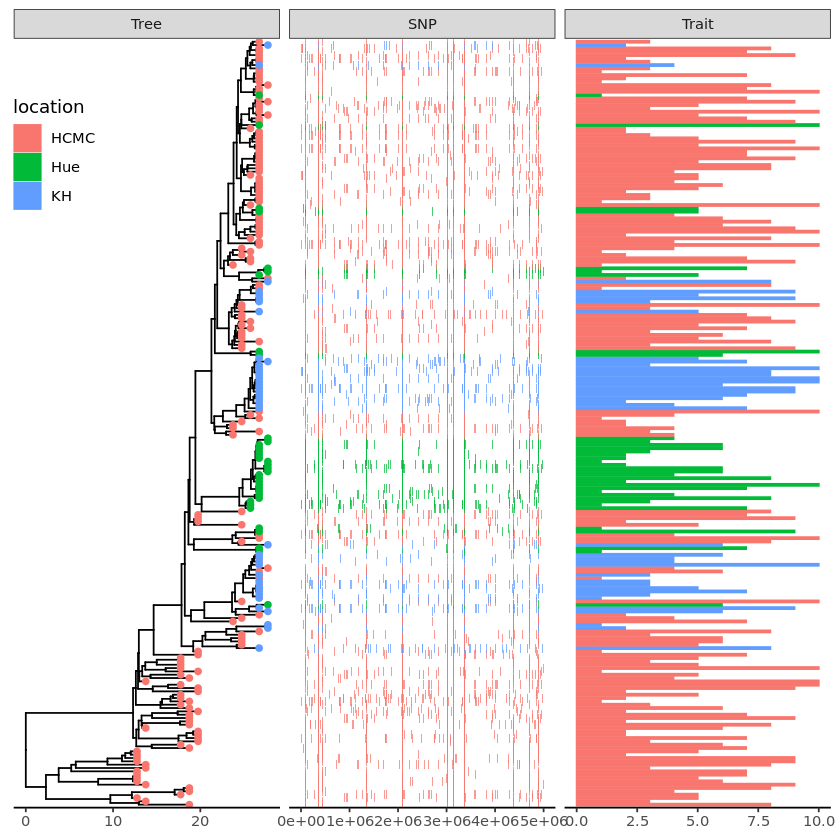

In [13]:
final_plot

In [17]:
ggsave(filename = "final_plot.png", plot = final_plot, height = 4, width = 6)